In [1]:
from sklearn.datasets import  fetch_openml
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

In [2]:
house_Data=fetch_openml("house_sales")

C:\Users\Admin\PycharmProjects\pythonProject1\pythonProject\Lib\site-packages\sklearn\datasets\_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name house_sales exist. Versions may be fundamentally different, returning version 1.
  warn(
C:\Users\Admin\PycharmProjects\pythonProject1\pythonProject\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
#test
housing_data=pd.DataFrame(house_Data.data,columns=house_Data.feature_names)
housing_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [203]:
Y=housing_data["price"]/1000
X=housing_data.drop(columns=['zipcode','date','price','view','lat','long','yr_built','yr_renovated','waterfront'])
print(housing_data["sqft_basement"].value_counts())

0.0      13126
600.0      221
700.0      218
500.0      214
800.0      206
         ...  
518.0        1
374.0        1
784.0        1
906.0        1
248.0        1
Name: sqft_basement, Length: 306, dtype: int64


In [194]:
age=np.array(2023-housing_data['yr_built']).reshape(-1,1)

In [210]:
X_=np.hstack((np.array(X),age))

X_train=X_[0:18000,:]
Y_train=np.array([Y])[0:18000,:]
Y_train=Y_train.reshape(-1,1)[0:18000,:]

X_test=np.array(X_)[18000:,:]
Y_test=np.array([Y]).reshape(-1,1)[18000:,:]


532.9793045555555

In [196]:
pipe=Pipeline([('scale',QuantileTransformer() ),
                ('model',KNeighborsRegressor(n_neighbors=3))])
pipe.get_params()


{'memory': None,
 'steps': [('scale', QuantileTransformer()),
  ('model', KNeighborsRegressor(n_neighbors=3))],
 'verbose': False,
 'scale': QuantileTransformer(),
 'model': KNeighborsRegressor(n_neighbors=3),
 'scale__copy': True,
 'scale__ignore_implicit_zeros': False,
 'scale__n_quantiles': 1000,
 'scale__output_distribution': 'uniform',
 'scale__random_state': None,
 'scale__subsample': 100000,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 3,
 'model__p': 2,
 'model__weights': 'uniform'}

In [197]:
grid=GridSearchCV(estimator=pipe,
                 param_grid={'model__n_neighbors':[1,2,3,4,5,6,7,8,9,10]},
                 cv=5)

In [198]:
model=grid.fit(X_train,Y_train)
predict_test=model.predict(X_test)
predict_train=model.predict(X_train)

In [201]:
loss=0
for i in range(predict_train.shape[0]):
   los=predict_train[i]-Y_train[i]
   loss=loss+los**2

train=loss/2*(21613-18000)

loss2=0
los=0
for i in range(predict_test.shape[0]):
   los=predict_test[i]-Y_test[i]
   loss2=loss2+los**2

test=loss2/2*(18000)

print(f"testing loss:{test} training loss: {train}")

testing loss:[1.90335628e+12] training loss: [1.24897654e+12]


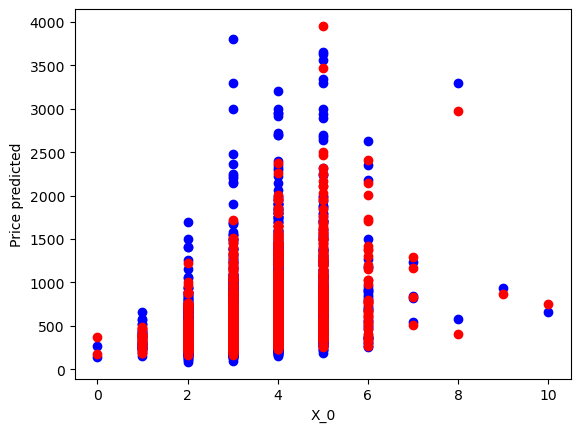

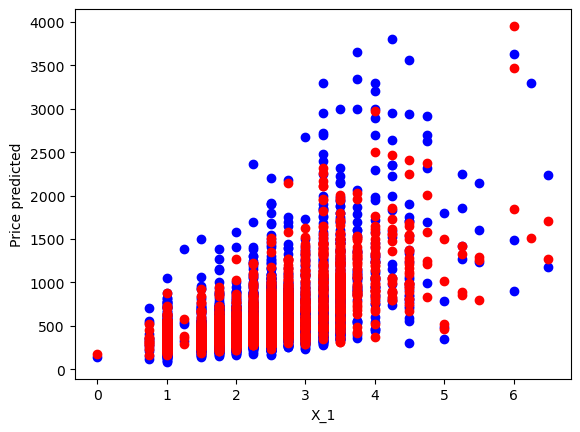

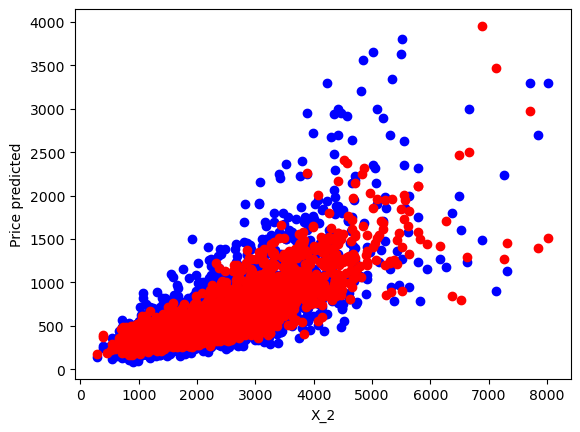

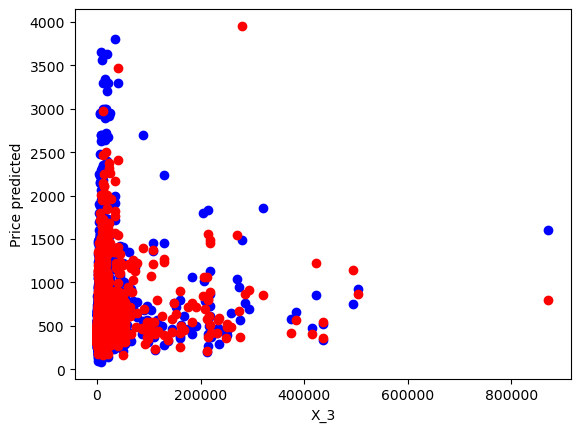

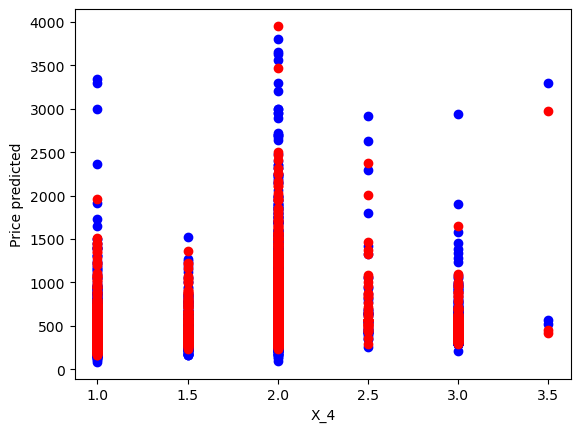

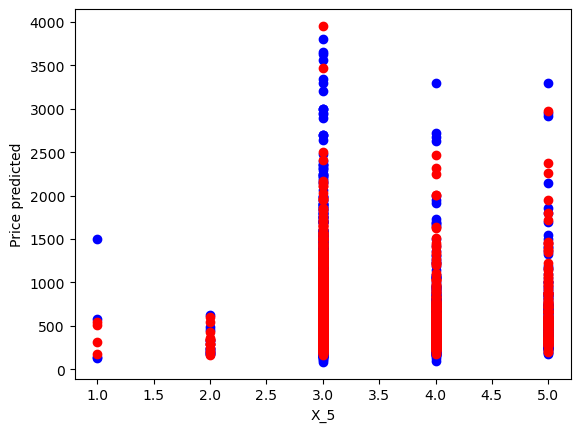

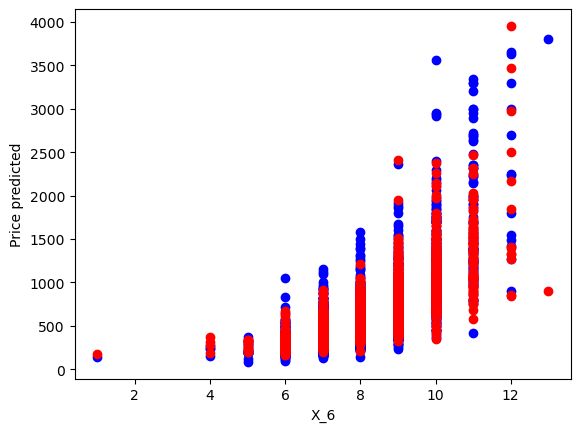

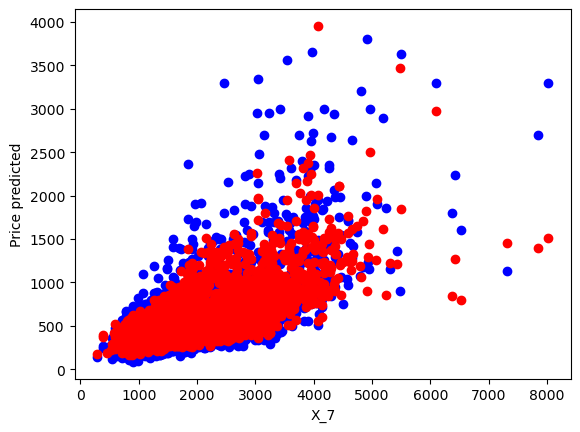

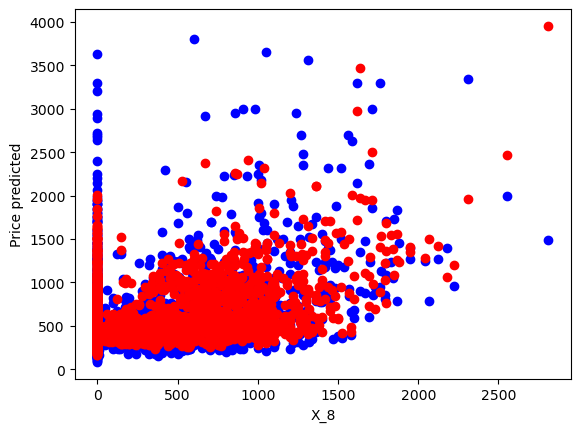

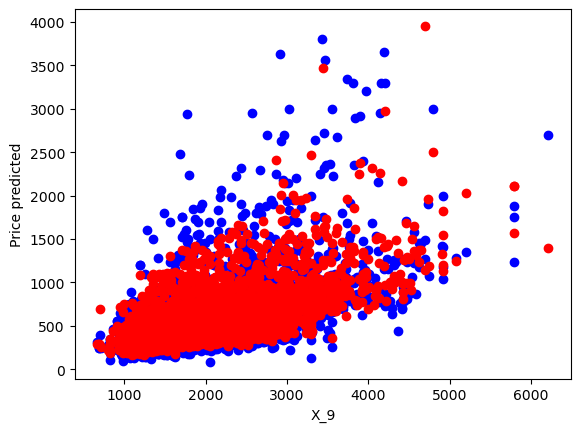

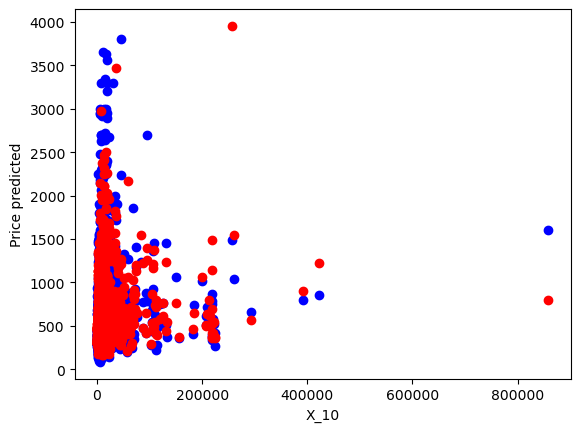

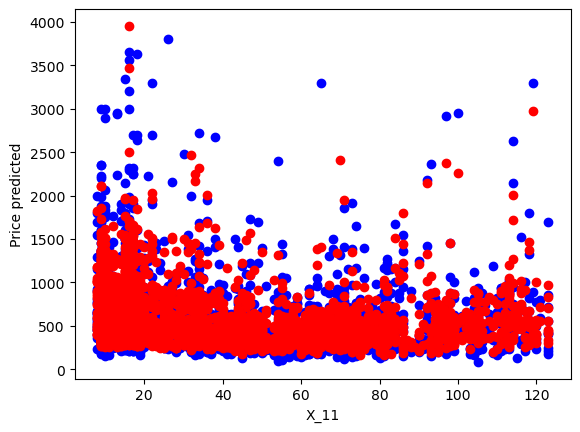

In [202]:
for i in range (12):
   plt.scatter(X_test[:,i],Y_test,c="blue")
   plt.scatter(X_test[:,i],predict_test,c="red")
   plt.xlabel(f"X_{i}")
   plt.ylabel("Price predicted")
   plt.show()

In [189]:
for i in range (10):
    print(predict_train[i],Y_train[i])


[324.47] [221.9]
[604.8] [538.]
[282.273] [180.]
[434.349] [604.]
[306.395] [510.]
[1493.0127] [1225.]
[297.935] [257.5]
[283.56] [291.85]
[302.065] [229.5]
[322.59] [323.]
